In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
xlsx = pd.ExcelFile('/Users/joshua/Data/sales_data.xlsx')
xlsx

In [29]:
sheets = xlsx.sheet_names
sheets

['so_tran']

In [30]:
df = pd.read_excel(xlsx, sheets[0])
df.head()

,sono,custno,cname,custpo,item,altitem,acustno,acustpo,acustname,cost,...,qtyshp,qtylft,qtybo,extprice,shipqty,seq,sostat,sotype,created,qtytoshp
0,170023,800,ANDERSON INSTRUMENT CO.,PO121654,BB1P111A08,55408A0000,NaN,NaN,NaN,0.06260,...,1000,0,0,160.00,0,1,C,O,2016-01-04,0
1,170022,800,ANDERSON INSTRUMENT CO.,PO123450,5115-15-H-ST,36605H0005,NaN,NaN,NaN,0.03893,...,74,0,0,5.51,0,1,C,O,2016-01-04,0
2,170020,800,ANDERSON INSTRUMENT CO.,PO123419,4778,42080A0001,NaN,NaN,NaN,0.42600,...,200,0,0,99.36,0,1,C,O,2016-01-04,0
3,170019,800,ANDERSON INSTRUMENT CO.,PO119193,36240S0505,36240S0505,NaN,NaN,NaN,0.02701,...,500,0,0,78.20,0,1,C,O,2016-01-04,0
4,170018,800,ANDERSON INSTRUMENT CO.,PO119386,44472B0001,44472B0001,NaN,NaN,NaN,0.19094,...,50,0,0,107.50,0,1,C,O,2016-01-04,0


In [32]:
df.columns

Index(['sono', 'custno', 'cname', 'custpo', 'item', 'altitem', 'acustno',
       'acustpo', 'acustname', 'cost', 'price', 'qtyord', 'qtyshp', 'qtylft',
       'qtybo', 'extprice', 'shipqty', 'seq', 'sostat', 'sotype', 'created',
       'qtytoshp'],
      dtype='object')

In [45]:
df.shape

(34489, 22)

In [52]:
data = df[['custno','item','qtyshp','cost']]
data.head()

,custno,item,qtyshp,cost
0,800,BB1P111A08,1000,0.06260
1,800,5115-15-H-ST,74,0.03893
2,800,4778,200,0.42600
3,800,36240S0505,500,0.02701
4,800,44472B0001,50,0.19094


0            BB1P111A08
1          5115-15-H-ST
2                  4778
3            36240S0505
4            44472B0001
5             AS568-132
6            36240V1507
7            26669A0001
8          ARC.68-A-C14
9          20000-450-12
10           36240S0505
11             44609-A2
12              BLT1322
13               700095
14        4K0A2-05C-12V
15         81006-1EC-12
16         PRC212CA12NP
17         4Q000-470-G3
18        4M0A3-030-32P
19         81007-TPP-12
20         20020-010-31
21        1E000-640-12S
22        1C000-950-34W
23         85010-1EC-12
24               703355
25         4M0A3-05C-12
26           MTL-S240-2
27             542-K-SS
28       14005-054-12TP
29               129018
              ...      
34459      12004-054-40
34460        AACS-04-08
34461      08004-05C-40
34462            7335-3
34463      513900032-40
34464          5182K681
34465      24032-060-60
34466      24112-350-12
34467      1G064-070-12
34468      1I040-070-12
34469      24000

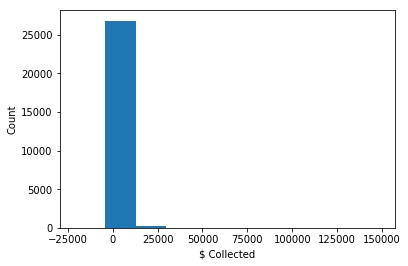

In [12]:
_ = plt.hist(df['paidamt'])
_ = plt.xlabel('$ Collected')
_ = plt.ylabel('Count')
plt.show()

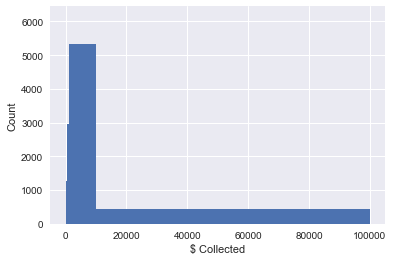

In [13]:
plt.gcf().clear()
sns.set()
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000, 10000, 100000]
_ = plt.hist(df['paidamt'], bins=bins)
_ = plt.xlabel('$ Collected')
_ = plt.ylabel('Count')
plt.show()

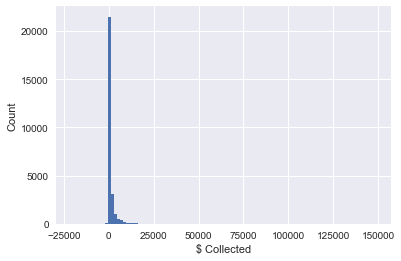

In [14]:
plt.gcf().clear()
_ = plt.hist(df['paidamt'], bins=100)
_ = plt.xlabel('$ Collected')
_ = plt.ylabel('Count')
plt.show()

In [ ]:
plt.gcf().clear()
df_adjusted = df[(df['paidamt'] >= 0)         & (df['paidamt']        <= 10000)]
_ = plt.hist(df_adjusted['paidamt'], bins=50)
_ = plt.xlabel('$ Collected')
_ = plt.ylabel('Count')
plt.show()

In [ ]:
plt.gcf().clear()
df_adjusted = df[(df['paidamt'] >= 0) & (df['paidamt'] <= 1000)]
_ = plt.hist(df_adjusted['paidamt'], bins=50)
_ = plt.xlabel('$ Collected')
_ = plt.ylabel('Count')
plt.show()

In [ ]:
plt.gcf().clear()
_ = sns.swarmplot(x='company', y='paidamt', data=df_adjusted)
_ = plt.xlabel('Customer')
_ = plt.ylabel('Spend')
plt.show()

In [ ]:
plt.gcf().clear()
max_purchase = 10000
vendor = ['ADVANCED MOTORS AND DRIVES INC.', 'WELCH ALLYN/ ACCTS PAYABLE']
df_adjusted = df[(df['paidamt'] >= 0) & (df['paidamt'] <= max_purchase)]
df_adjusted_vendor = df_adjusted.loc[df['company'].isin(vendor)]
_ = sns.swarmplot(x='company', y='paidamt', data=df_adjusted_vendor)
_ = plt.xlabel('Customer')
_ = plt.ylabel('Spend')
plt.show()

In [ ]:
plt.gcf().clear()
vendor = ['ADVANCED MOTORS AND DRIVES INC.']
df_adjusted_vendor = df_adjusted.loc[df['company'].isin(vendor)]
x = np.sort(df_adjusted_vendor['paidamt'])
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Sales')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()